# ch03.05. 기초통계 - 산포통계량
---
* 날짜: 2022.05.09
* 이름: 윤태우

## 학습내용
    * 산포 통계량
      - 분산
      - 표준편차
      - 변동계수
      - 스케일링
      - 범위와 사분위 범위

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  산포 통계
---

* 산포란 데이터가 얼마나 퍼져있는지를 의미

* 따라서 산포 통계량이란 데이터의 산포를 나타내는 통계량이라 할 수 있다.

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```


* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [34]:
# 넘파이 랜덤 시드 0으로 설정
# 넘파이 배열 `a1`로 바인딩
np.random.seed(0)
a1 = np.random.normal(0,1,1000)

# 판다스 시리즈 `s1`로 바인딩
s1 = pd.Series(a1)

* 평균 0, 표준편차 3인 정규분포 데이터 1000개를 생성하기

In [35]:
# 넘파이 랜덤 시드 0으로 설정
# 넘파이 배열 `a3`로 바인딩
np.random.seed(0)
a3 = np.random.normal(0,3,1000)
# 판다스 시리즈 `s3`로 바인딩
s3 = pd.Series(a3)

* `a1`와 `a3`의 분포 그리기

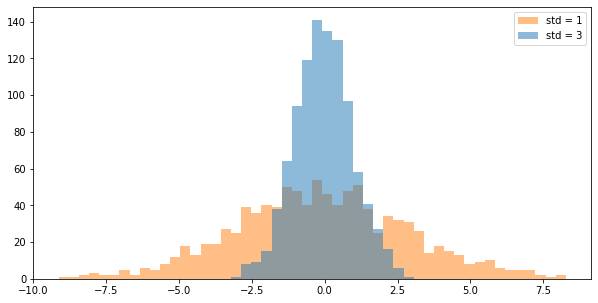

In [36]:
plt.figure(figsize=(10,5))
plt.hist([a1,a3], alpha = 0.5, histtype = 'stepfilled', bins = 50)
plt.legend(['std = 1', 'std = 3'])

### **| 분산**

\begin{align}
var(x) = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1} 
\end{align}
\begin{align}
 & \\
 & x_i :? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.var(a, ddof) 
a.var(ddof)
s.var(ddof)
```

* `a1`과 `a3`의 분산을 계산

In [37]:
np.var(a1, ddof = 0), np.var(a1, ddof = 1), np.var(a3, ddof = 0), np.var(a3, ddof = 1)     # 자유도 ddof = 1 형식으로 적어야함.

(0.9742344563121542, 0.9752096659781323, 8.768110106809388, 8.776886993803192)

### **| 표준편차**


\begin{align}
std(x)= \sqrt{var(x)} = 
\sqrt{\frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1}} 
\end{align}
\begin{align}
 & \\
 & x_i : ? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.std(a, ddof) 
a.std(ddof)
s.std(ddof)
```

* `a1`과 `a3`의 표준편차 계산

In [38]:
print(f'std \na1(ddof = 0) : {np.std(a1, ddof = 0)}, a1(ddof = 1) : {np.std(a1, ddof = 1)} \na3(ddof = 0) : {np.std(a3, ddof = 0)}, a3(ddof = 1) : {np.std(a3, ddof = 1)}')

std 
a1(ddof = 0) : 0.9870331586690257, a1(ddof = 1) : 0.9875270456945128 
a3(ddof = 0) : 2.9610994760070772, a3(ddof = 1) : 2.9625811370835384


* `a1`의 분산과 `a1`의 표준편차제곱을 비교

In [39]:
print(f'ddof = 0 >>> var : {np.var(a1, ddof = 0)}, sigma^2 : {(np.std(a1, ddof = 0))**2}')
print(f'ddof = 1 >>> var : {np.var(a1, ddof = 1)}, sigma^2 : {(np.std(a1, ddof = 1))**2}')

ddof = 0 >>> var : 0.9742344563121542, sigma^2 : 0.9742344563121541
ddof = 1 >>> var : 0.9752096659781323, sigma^2 : 0.9752096659781323


### **| 변동계수**

분산 혹은 표준편차를 스케일에 영향을 받지 않도록 데이터를 스케일링 한 후 분산 혹은 표준편차를 계산


\begin{align}
변동계수 = \frac{var(x) \ or \ std(x) }{Scale(x)} 
\end{align}


#### **변동계수의 필요성**

* `a1`의 모든 요소에 10을 곱한 배열 `a10`을 생성

In [40]:
a10 = a1*10

* `a1`과 `a10`의 분산 계산

In [41]:
print(f'a1(var) : {np.var(a1, ddof = 1)}, a10(var) : {np.var(a10, ddof = 1)}')

a1(var) : 0.9752096659781323, a10(var) : 97.52096659781323


#### **스케일링: min-max**

**min-max scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
minmax(x)=\frac{x-min(x)}{max(x)-min(x)}
\end{align}

\begin{align}
 & \\
 & x : ? \\
 & min(x) : ?\\
 & max(x) : ?\\ 
\end{align}



* min-max 함수 생성

In [42]:
def minmax(X) :
  X1 = np.array([])
  for i in X :
    X1 = np.append(X1, (  i - np.min(X)  ) / (  np.max(X) - np.min(X)  )  )
  return X1

* `a1`을 min-max scaling 하여 `a1_minmax` 로 바인딩

In [43]:
a1_minmax = minmax(a1)

* `a10`을 min-max scaling 하여 `a10_minmax` 로 바인딩

In [44]:
a10_minmax = minmax(a10)

In [45]:
np.max(a1_minmax) 

1.0

* `a1`과 `a1_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

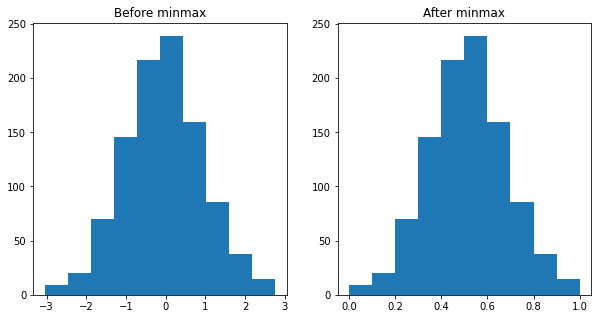

In [46]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(a1)
plt.title('Before minmax')

plt.subplot(1,2,2)
plt.hist(a1_minmax)
plt.title('After minmax')
plt.show()

* `a10`과 `a10_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

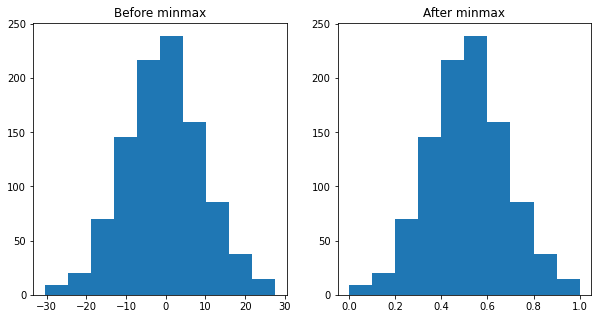

In [47]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(a10)
plt.title('Before minmax')

plt.subplot(1,2,2)
plt.hist(a10_minmax)
plt.title('After minmax')
plt.show()

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [48]:
print(f'before : {np.ptp(a1)}, after : {np.ptp(a1_minmax)}')
print(f'before : {np.ptp(a10)}, after : {np.ptp(a10_minmax)}')

before : 5.805498168821509, after : 1.0
before : 58.05498168821509, after : 1.0


* 스케일링 후 `a1_minmax`, `a10_minmax`의 분산 구하기

In [49]:
print(f'before : {np.var(a1, ddof = 1)}, after : {np.var(a1_minmax, ddof = 1)}')
print(f'before : {np.var(a10, ddof = 1)}, after : {np.var(a10_minmax, ddof = 1)}')

before : 0.9752096659781323, after : 0.028934701900306115
before : 97.52096659781323, after : 0.02893470190030611


#### **스케일링: z-score**

**standard(z-socre) scaling** : 평균 0, 표준편차 1을 따르는 정규분포로 스케일링 하는  기법.

\begin{align}
\\
standard(x)=\frac{x-\mu}{\sigma}
\end{align}
\begin{align}
 & \\
 & x : ? \\
 & \mu : ?\\
 & \sigma : ?\\ 
\end{align}


* standard 함수 생성

In [50]:
# 표준 편차 = 분산의 제곱근

def standard(X) :
  return ( X - np.mean(X) ) /  np.std(X, ddof = 0)

* `a1`을 standard 하여 `a1_standard` 로 바인딩

In [51]:
a1_standard = standard(a1)

* `a10`을 standard 하여 `a10_standard` 로 바인딩

In [52]:
a10_standard = standard(a10)

* `a1`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

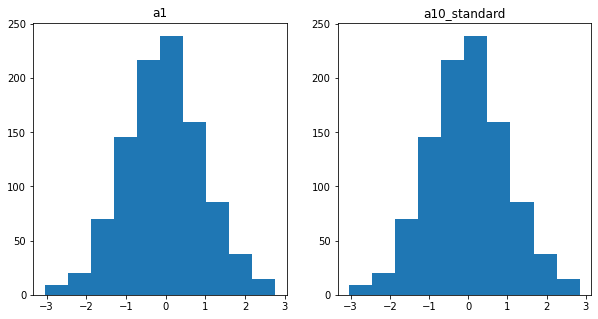

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.hist(a1)
plt.title('a1')

plt.subplot(1,2,2)
plt.hist(a10_standard)
plt.title('a10_standard')
plt.show()

* `a10`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

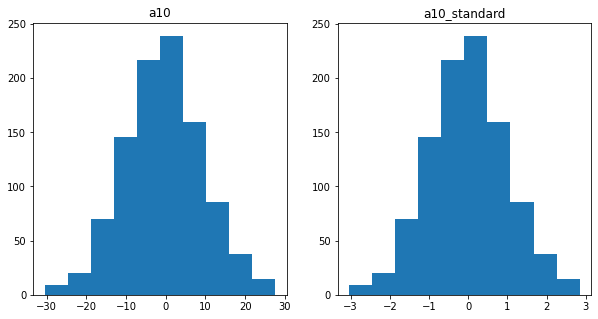

In [61]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(a10)
plt.title('a10')

plt.subplot(1,2,2)
plt.hist(a10_standard)
plt.title('a10_standard')
plt.show()

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [55]:
print(f'before(a1) : {np.ptp(a1)}  after(a1) : {np.ptp(a1_standard)} \nbefore(a10) : {np.ptp(a10)}, after(a10) : {np.ptp(a10_standard)}')

before(a1) : 5.805498168821509  after(a1) : 5.881766096541263 
before(a10) : 58.05498168821509, after(a10) : 5.881766096541263


* 스케일링 후 `a1_standard`, `a10_standard`의 분산 구하기

In [56]:
print(f'before(a1) : {np.var(a1)}  after(a1) : {np.var(a1_standard)} \nbefore(a10) : {np.var(a10)}, after(a10) : {np.var(a10_standard)}')

before(a1) : 0.9742344563121542  after(a1) : 1.0000000000000002 
before(a10) : 97.42344563121542, after(a10) : 1.0000000000000002


### **| 범위와 사분위 범위**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0305-01.png?raw=true?raw=true width=800>
</p>


* `a10` 의 분포 그리기

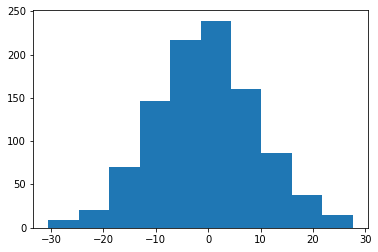

In [57]:
plt.hist(a10)
plt.show()

#### **범위**

\begin{align}
\\
범위 = max(x)-min(x)
\end{align}

```
np.ptp(x)
```

* `a10`의 범위 구하기

In [58]:
# np.ptp 사용
print(np.ptp(a10))
# max-min 사용
print(np.ptp(a10_minmax))

58.05498168821509
1.0



#### **사분위 범위**

\begin{align}
\\
사분위 범위 = 3사분위수 - 1사분위수 = 하위 75 \% 수 - 하위 25\% 수
\end{align}

```
np.quntile(x, percent)
```

* `a10`의 사분위 범위 구하기

In [59]:
np.quantile(a10, 0.75)-np.quantile(a10, 0.25)

13.053706612482689

In [60]:
s = pd.Series(a10)
s.describe()

count    1000.000000
mean       -0.452567
std         9.875270
min       -30.461431
25%        -6.984201
50%        -0.580280
75%         6.069506
max        27.593551
dtype: float64